# Design Process Figure

This notebook demonstrates the design process figure example, a simple demonstration of the design process using the general strategy. We can express criteria and approaches as objectives, blend them together, and tune the parameters to create subsets for visualization.

### Imports and Setup

In [1]:
# Third party libraries
import matplotlib.pyplot as plt
import matplotlib_inline

import numpy as np
import seaborn as sns 

# Local imports
import sets, loss, solver, plot

# Initialize notebook settings
sns.set_theme() # set seaborn theme
matplotlib_inline.backend_inline.set_matplotlib_formats('svg') # vector plots
%matplotlib inline 
%load_ext autoreload
%autoreload 2

## Express

Different criteria are expressed as objectives such as preserving the hull, highlighting outliers, or selecting distinctive points.

In [2]:
# Create a random blobs dataset to use as our example dataset
dataset = sets.Dataset(randTypes="blobs", size=(500, 2), seed=123)
dataset.save("designProcess")

### Convex Hull Objective

In [3]:
# Precalculate the hull metric on the full dataset
dataset.preprocess(hull = loss.hullMetric)

# Create a unicriterion loss function with the hull metric and precomputation
lossFunction = loss.UniCriterion(objective = loss.preserveMetric, 
                                 metric = loss.hullMetric,
                                 datasetMetric = dataset.hull)

# Create a solve method with a greedy algorithm and a set subset size
solveMethod = solver.Solver(algorithm = solver.greedySwap, 
                            loss = lossFunction)

# Solve for a convex hull subset
z, t, l = solveMethod.solve(dataset, subsetSize=10)
subsetHull = sets.Subset(dataset, z)
subsetHull.save("designProcessHull")

### Outliers Objective

In [4]:
# Precalculate the outlierness (local outlier effect) of the full dataset
dataset.preprocess(outlierness = loss.outlierness)

# Create a loss function that is just the sum of the LOF in the subset
solveMethod.loss = loss.UniCriterion(objective=np.sum, solveArray="outlierness")

# Solve for an outlier subset
z, t, l = solveMethod.solve(dataset, subsetSize=40)
subsetOutliers = sets.Subset(dataset, z)
subsetOutliers.save("designProcessOutliers")

### Distinctiveness Subset

In [5]:
# Create a unicriterion loss function with the distinctiveness objective
dataset.preprocess(distances = loss.distanceMatrix)
solveMethod.loss = loss.UniCriterion(objective = loss.distinctiveness, 
                                     solveArray = "distances",
                                     selectBy = "matrix")

# Solve for distinctiveness subset
z, t, l = solveMethod.solve(dataset = dataset, 
                            subsetSize = 60, 
                            solveArray = "distances",
                            selectBy = "matrix")
subsetDistinct = sets.Subset(dataset, z)
subsetDistinct.save("designProcessDistinct")

### Plot

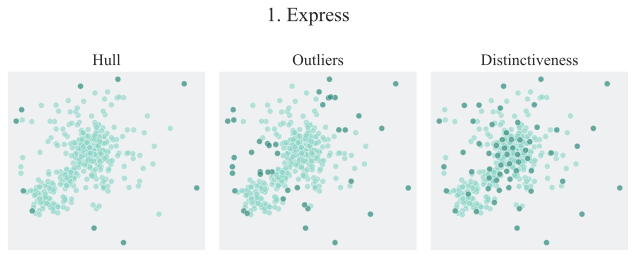

In [6]:
# Initialize color and plot settings
color = plot.Color()
plot.initialize(color)

titleSize = 20
subtitleSize = 16
titles = ["Hull", "Outliers", "Distinctiveness"]
subsets = [subsetHull, subsetOutliers, subsetDistinct]

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(9, 4))
plt.suptitle("1. Express    ", fontsize=titleSize)

for i, ax in enumerate(fig.axes):
    # ax.axis('off')  # Turn off axis for simplicity
    ax.grid(visible=False)
    ax.set_xticks([])
    ax.set_yticks([])
    # ax.set_xlim([1, 5])
    # ax.set_ylim([1, 5])
    ax.set_title(titles[i], fontsize=subtitleSize)
    ax.set_aspect("equal")

    plot.scatter(ax = ax, 
                 color = color, 
                 dataset = dataset, 
                 subset = subsets[i], 
                 alpha = 0.6)

plt.savefig("figures/express.pdf", bbox_inches="tight")

## Blend

A simple example of how we can blend objectives at different levels by varying the weight parameters.

In [7]:
subsetSize = 80
objectives = [loss.earthMoversDistance, loss.distinctiveness]
parameters = [{"dataset": dataset.dataArray}, 
              {"solveArray": "distances", "selectBy": "matrix"}]
weights = np.array([1000, 0.1])
solveMethod.loss = loss.MultiCriterion(objectives, parameters, weights=weights)

z, t, l = solveMethod.solve(dataset, subsetSize=subsetSize)
subsetBlend1 = sets.Subset(dataset, z)
subsetBlend1.save("designProcessBlend1")

In [8]:
weights = np.array([10, 0.1])
solveMethod.loss = loss.MultiCriterion(objectives, parameters, weights=weights)

z, t, l = solveMethod.solve(dataset, subsetSize=subsetSize)
subsetBlend2 = sets.Subset(dataset, z)
subsetBlend2.save("designProcessBlend2")

In [9]:
weights = np.array([1, 1])
solveMethod.loss = loss.MultiCriterion(objectives, parameters, weights=weights)

z, t, l = solveMethod.solve(dataset, subsetSize=subsetSize)
subsetBlend3 = sets.Subset(dataset, z)
subsetBlend3.save("designProcessBlend3")

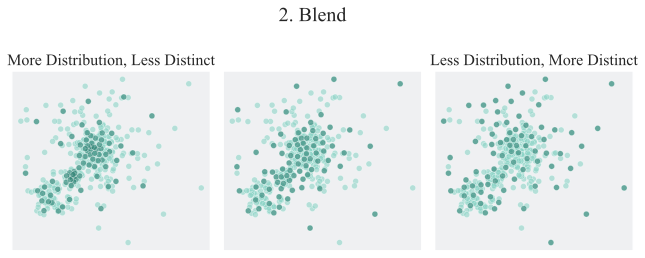

In [10]:
titles = ["More Distribution, Less Distinct", "", "Less Distribution, More Distinct"]
subsets = [subsetBlend1, subsetBlend2, subsetBlend3]

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(9, 4))
plt.suptitle("2. Blend    ", fontsize=titleSize)

for i, ax in enumerate(fig.axes):
    # ax.axis('off')  # Turn off axis for simplicity
    ax.grid(visible=False)
    ax.set_xticks([])
    ax.set_yticks([])
    # ax.set_xlim([1, 5])
    # ax.set_ylim([1, 5])
    ax.set_title(titles[i], fontsize=subtitleSize)
    ax.set_aspect("equal")

    plot.scatter(ax = ax, 
                 color = color, 
                 dataset = dataset, 
                 subset = subsets[i], 
                 alpha = 0.6)

plt.savefig("figures/blend.pdf", bbox_inches="tight")

## Tune

A basic example of the subset size parameter being tuned for different results

In [11]:
# Create a unicriterion loss function with the distinctiveness objective
solveMethod.loss = loss.UniCriterion(objective = loss.distinctiveness, 
                                     solveArray = "distances",
                                     selectBy = "matrix")

# Solve for subsets with 3 different subset sizes
z, t, l = solveMethod.solve(dataset = dataset, subsetSize = 30)
subsetDistinct1 = sets.Subset(dataset, z)
subsetDistinct1.save("designProcessDistinct1")

z, t, l = solveMethod.solve(dataset = dataset, subsetSize = 75)
subsetDistinct2 = sets.Subset(dataset, z)
subsetDistinct2.save("designProcessDistinct2")

z, t, l = solveMethod.solve(dataset = dataset, subsetSize = 100)
subsetDistinct3 = sets.Subset(dataset, z)
subsetDistinct3.save("designProcessDistinct3")

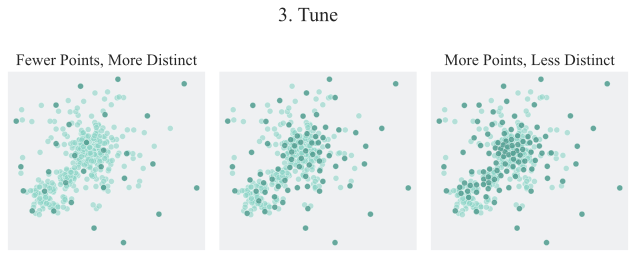

In [12]:
titles = ["Fewer Points, More Distinct", "", "More Points, Less Distinct"]
subsets = [subsetDistinct1, subsetDistinct2, subsetDistinct3]

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(9, 4))
plt.suptitle("3. Tune    ", fontsize=titleSize)

for i, ax in enumerate(fig.axes):
    # ax.axis('off')  # Turn off axis for simplicity
    ax.grid(visible=False)
    ax.set_xticks([])
    ax.set_yticks([])
    # ax.set_xlim([1, 5])
    # ax.set_ylim([1, 5])
    ax.set_title(titles[i], fontsize=subtitleSize)
    ax.set_aspect("equal")

    plot.scatter(ax = ax, 
                 color = color, 
                 dataset = dataset, 
                 subset = subsets[i], 
                 alpha = 0.6)

plt.savefig("figures/tune.pdf", bbox_inches="tight")